In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/RestaurantVisitors.csv',index_col='date', parse_dates=True)

In [4]:
df = df.asfreq('D')

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
#Dropping NAN data
df1 = df.dropna()

In [7]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
#Converting the columns in to int
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [9]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [10]:
for columns in cols:
    df1[columns] = df1[columns].astype(int)

In [11]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


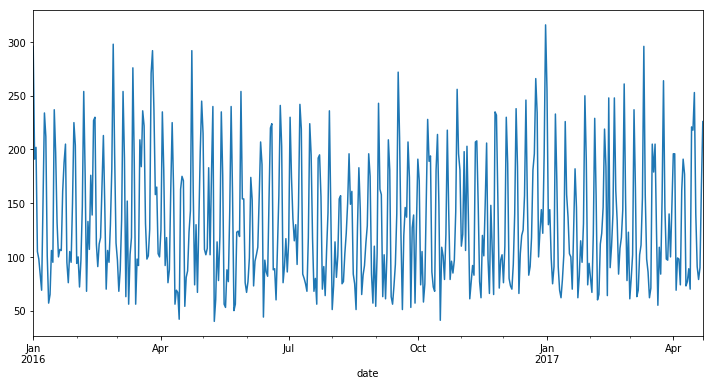

In [12]:
df1['total'].plot(figsize=(12,6))

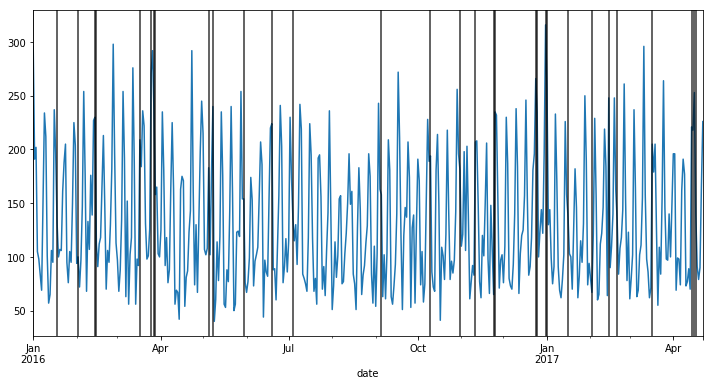

In [14]:
#Checking for holidays
ax = df1['total'].plot(figsize=(12,6))

for days in df1.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.8)

In [16]:
#Checking seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

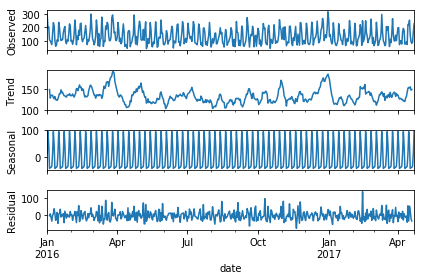

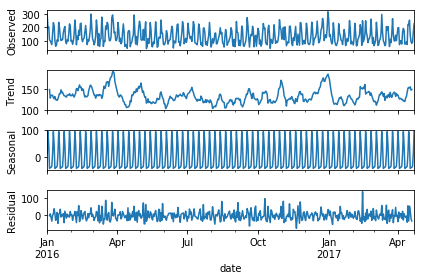

In [19]:
results = seasonal_decompose(df1['total'])
results.plot()

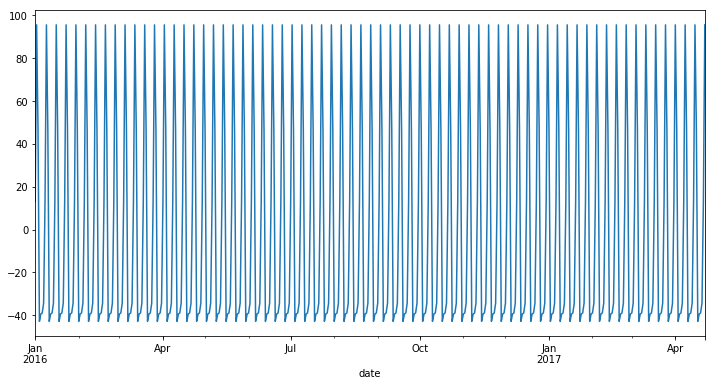

In [22]:
results.seasonal.plot(figsize=(12,6))

In [23]:
len(df1)

478

In [24]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [25]:
from pmdarima import auto_arima

In [26]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Wed, 04 Sep 2019   AIC                           4845.442
Time:                                   18:15:27   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5664      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3929     86.678     16.468      0.000    1257.507    1597.279
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [30]:
results = model.fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Wed, 04 Sep 2019   AIC                           4457.403
Time:                                   18:22:01   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
#Prediction
start = len(train)
end = len(train) + len(test) - 1

In [34]:
predictions = results.predict(start,end).rename('SARIMA Model')

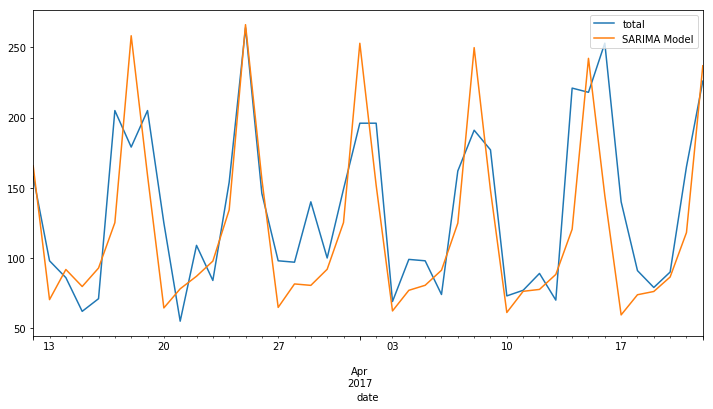

In [36]:
test['total'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

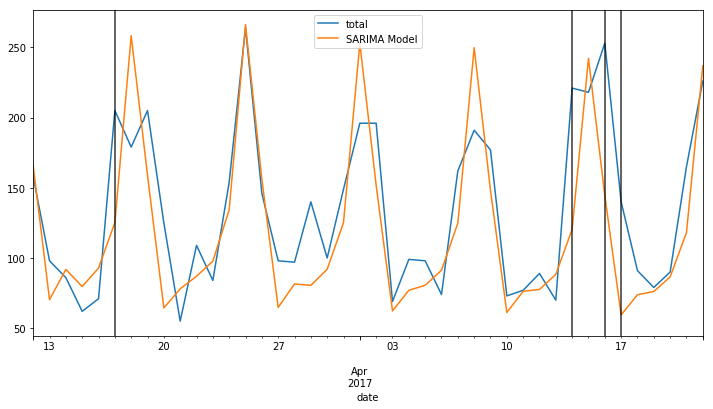

In [37]:
#Checking with holidays
ax = test['total'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

for days in test.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.8)

In [39]:
#evaluate the model
from statsmodels.tools.eval_measures import rmse

In [40]:
rmse(test['total'],predictions)

41.263154947712025

In [42]:
#Adding Exogenous variables
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.684
Date:                           Wed, 04 Sep 2019   AIC                           4709.368
Time:                                   18:40:21   BIC                           4734.386
Sample:                                        0   HQIC                          4719.204
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5604      4.273      2.705      0.007       3.186      19.935
x1            74.8501      4.546     16.463      0.000      65.939      83.761
ma.L1          0.1782      0.051      3.475      0.001       0.078       0.279
ar.S.L7        0.5058      0.045     11.227      0.000       0.417       0.594
ar.S.L14       0.3842      0.043      8.979      0.000       0.300       0.468
sigma2      1142.1372     80.205     14.240      0.000     984.938    1299.337
===================================================================================
Ljung-Box (Q):                       85.02   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model =  SARIMAX(train['total'],exog=train[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [44]:
results = model.fit()

In [45]:
start = len(train)
end = len(test) + len(train) - 1

In [46]:
predictions = results.predict(start,end,exog=test[['holiday']]).rename('SARIMAX Model')

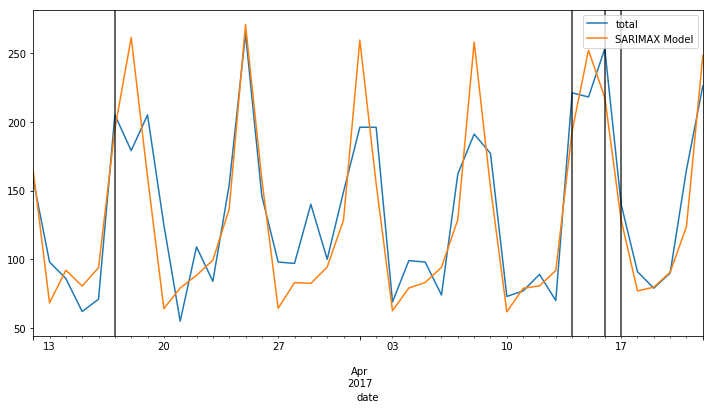

In [47]:
#Checking with holidays
ax = test['total'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

for days in test.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.8)

In [48]:
rmse(test['total'],predictions)

31.092534378092402

In [49]:
#Forecasting
model =  SARIMAX(df1['total'],exog=df1[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [50]:
results = model.fit()

In [53]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [55]:
exo_forecast = df[478:][['holiday']]

In [56]:
exo_forecast

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [57]:
fcast = results.predict(len(df1),len(df1)+38,exog=exo_forecast).rename('Final SARIMAX Model')

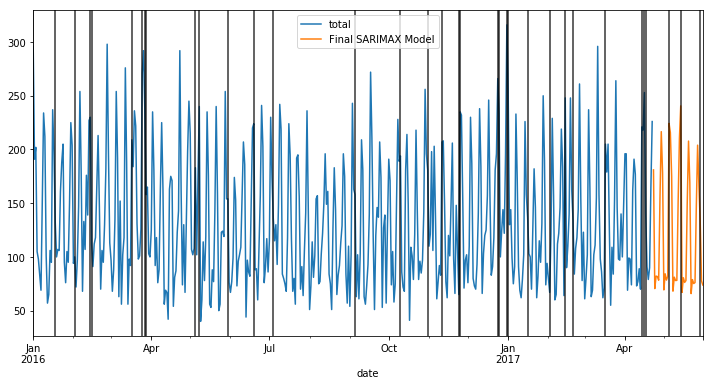

In [61]:
ax = df1['total'].plot(figsize=(12,6),legend=True)
fcast.plot(legend=True)

for days in df.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.8)

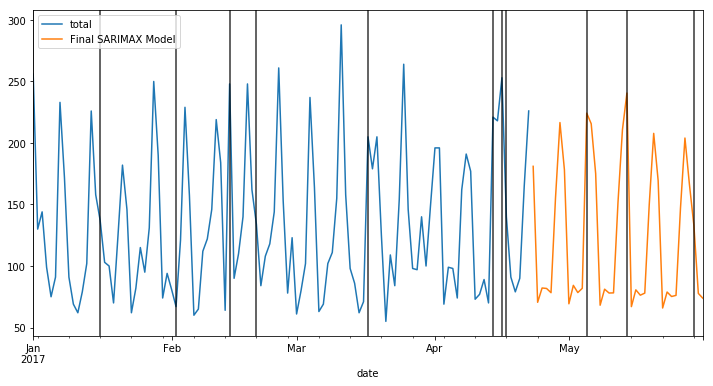

In [63]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(12,6),legend=True)
fcast.plot(legend=True)

for days in df.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.8)